In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_theme(style="darkgrid")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
import random 
random.seed(10)

In [5]:
data = pd.read_csv('CHURN.csv',sep = ";")
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,608,41,1,83807.86,1,0,1,112542.58,0
1,699,39,1,0.00,2,0,0,93826.63,0
2,850,43,2,125510.82,1,1,1,79084.10,0
3,822,50,7,0.00,2,1,1,10062.80,0
4,501,44,4,142051.07,2,0,1,74940.50,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 703.3 KB


In [7]:
numeric = []
for i in data.columns : 
    if len(np.unique(data[i])) > 5 :
        numeric.append(i)
numeric

['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

### Unbalanced data

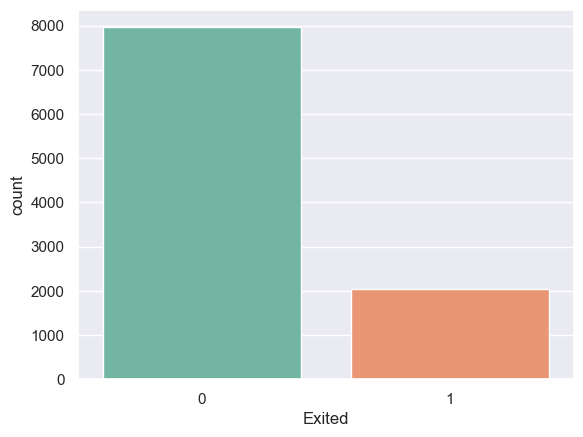

In [8]:
sns.countplot(x="Exited",data=data,palette ="Set2");

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,0:-1], 
                                                    data.Exited, 
                                                    test_size=0.2,
                                                    random_state=23)

### Normalisation des variables numeriques

In [10]:
for i in numeric :
    u = X_train[i].mean()
    sigma = X_train[i].std()
    X_train[i] = X_train[i].apply(lambda x : (x - u) / sigma)
    X_test[i] = X_test[i].apply(lambda x : (x - u) / sigma)

### Rebalancing data using SMOTE

In [11]:
smote = SMOTE(sampling_strategy=0.85)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

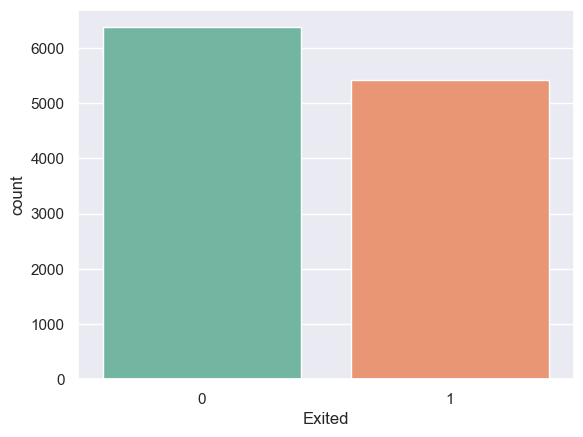

In [12]:
sns.countplot(x="Exited",data=pd.concat([X_resampled, y_resampled],axis = 1),palette ="Set2");

# Simple ANN

In [13]:
target = 'Exited'
features = [x for x in list(data.columns) if x != target]

In [14]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='binary_crossentropy',optimizer="adam", metrics=['accuracy'])

In [16]:
history = model.fit(X_train, y_train, epochs=50, batch_size=100, verbose=0)

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [18]:
test_set_preds = [round(x[0]) for x in model.predict(X_test)]
test_preds = [x[0] for x in model.predict(X_test)]
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)
test_roc_auc = auc(test_fpr, test_tpr)
[round(x[0]) for x in model.predict(X_test)][:20]

63/63 [==============================] - 0s 919us/step


[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [19]:
print(f'Accuracy for test set: {accuracy_score (y_test, test_set_preds)}')
print('\n')
print(f'Roc Auc for test set: {test_roc_auc}')

Accuracy for test set: 0.838


Roc Auc for test set: 0.7995273339222588


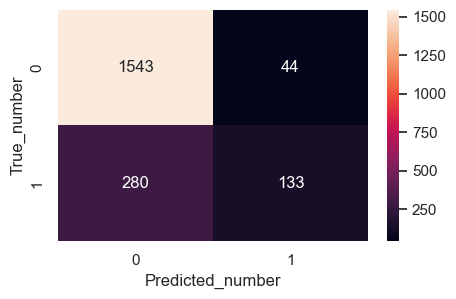

In [20]:
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=test_set_preds)
plt.figure(figsize = (5,3))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number');

# MLP

In [21]:
model = Sequential()
model.add(Dense(16, input_dim=len(features), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train, epochs=50, batch_size=100,verbose=0)

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16)                144       
                                                                 
 dense_3 (Dense)             (None, 16)                272       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________


In [25]:
test_set_preds = [round(x[0]) for x in model.predict(X_test)]
test_preds = [x[0] for x in model.predict(X_test)]
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, test_preds)
test_roc_auc = auc(test_fpr, test_tpr)

63/63 [==============================] - 0s 887us/step


In [26]:
pd.DataFrame({
    "y_pred": test_set_preds,
    "y_true": y_test
})

,y_pred,y_true
6326,0,0
5185,0,0
2495,0,0
2765,0,0
9303,0,1
...,...,...
5640,0,0
8667,0,1
6027,1,0
8662,0,1


In [27]:
print(f'Accuracy for test set: {accuracy_score (y_test, test_set_preds)}')
print('\n')
print(f'Roc Auc for test set: {test_roc_auc}')

Accuracy for test set: 0.851


Roc Auc for test set: 0.8315963083833386


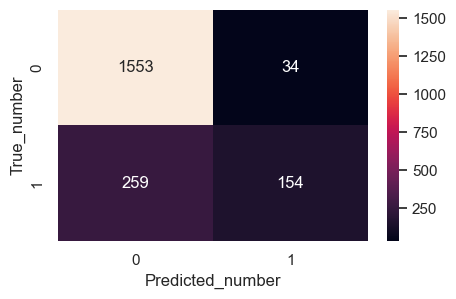

In [26]:
conf_mat = tf.math.confusion_matrix(labels=y_test,predictions=test_set_preds)
plt.figure(figsize = (5,3))
sns.heatmap(conf_mat, annot=True,fmt='d')
plt.xlabel('Predicted_number')
plt.ylabel('True_number');

# Previsions Salaire

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[[x for x in data.columns if x != "EstimatedSalary"]], 
                                                    data.EstimatedSalary.values.reshape(-1,1), 
                                                    test_size=0.2,
                                                    random_state=23)
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

names = X_train.columns[X_train.nunique()>5].values.tolist()

cat_train = X_train[X_train.columns[X_train.nunique()<5]].reset_index(drop=True)
cat_test = X_test[X_test.columns[X_test.nunique()<5]].reset_index(drop=True)

# scale the training data
x_scaler.fit(X_train[X_train.columns[X_train.nunique()>5]])
y_scaler.fit(y_train)
X_train = x_scaler.transform(X_train[X_train.columns[X_train.nunique()>5]])
X_test = x_scaler.transform(X_test[X_test.columns[X_test.nunique()>5]])
y_train = y_scaler.transform(y_train)
y_test =y_scaler.transform(y_test)

X_train = pd.concat([pd.DataFrame(X_train,columns=names),cat_train],axis=1)
X_test = pd.concat([pd.DataFrame(X_test,columns=names),cat_test],axis=1)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,0.770,0.337838,1.0,0.490956,2,1,1,0
1,0.748,0.162162,0.9,0.567864,1,1,1,0
2,1.000,0.175676,0.4,0.363864,1,1,1,0
3,0.984,0.256757,0.4,0.527888,2,1,0,1
4,0.544,0.540541,0.7,0.466015,1,1,0,1
...,...,...,...,...,...,...,...,...
7995,0.332,0.229730,1.0,0.414864,2,0,0,0
7996,0.782,0.621622,0.2,0.276252,1,1,1,0
7997,0.524,0.459459,0.5,0.577018,1,0,0,1
7998,0.090,0.216216,0.5,0.422528,1,1,1,1


In [28]:
model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (X_train.shape[1],)))
model.add(Dense(1,activation = "linear"))
model.compile(optimizer = 'adam', loss = "mean_absolute_error",metrics=["mean_absolute_error"])
model_training = model.fit(x = X_train, y = y_train, epochs = 100, validation_data = (X_test, y_test),verbose=0)

In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                144       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [30]:
predictions = model.predict(X_test)

predicted_salaries = y_scaler.inverse_transform(predictions)
real_salaries = y_scaler.inverse_transform(y_test.reshape(-1, 1))

salaries = pd.DataFrame({
    "Real": real_salaries.ravel(),
    "Predicted": predicted_salaries.ravel()
})
salaries

63/63 [==============================] - 0s 823us/step


,Real,Predicted
0,188809.23,99626.953125
1,56028.79,100859.328125
2,20199.30,110242.710938
3,24435.77,116539.765625
4,183051.60,104770.296875
...,...,...
1995,179473.26,108786.015625
1996,146895.36,92260.039062
1997,8199.50,98398.343750
1998,22197.80,122068.593750


# Classification multi-class sur le nombre de produits

In [31]:
np.unique(data.NumOfProducts,return_counts=True)

(array([1, 2, 3, 4], dtype=int64),
 array([5084, 4590,  266,   60], dtype=int64))

In [32]:
X_train, X_test, y_train, y_test = train_test_split(data[[x for x in data.columns if x != "NumOfProducts"]], 
                                                    data[["NumOfProducts"]],#.values.reshape(-1,1), 
                                                    test_size=0.2,
                                                    random_state=23)
y_train = tf.keras.utils.to_categorical(y_train)[:, 1:]
y_test = tf.keras.utils.to_categorical(y_test)[:, 1:]

In [40]:
model = Sequential()
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(16, activation='relu'))
model.add(Dense(data.NumOfProducts.nunique(), activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 16)                144       
                                                                 
 dense_18 (Dense)            (None, 16)                272       
                                                                 
 dense_19 (Dense)            (None, 4)                 68        
                                                                 
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________


In [42]:
history = model.fit(x = X_train, y = y_train, epochs = 50, validation_data = (X_test, y_test),verbose=0)

In [43]:
y_pred=np.argmax(model.predict(X_test),axis=1)
y_true = np.argmax(y_test, axis=1)

63/63 [==============================] - 0s 1ms/step


In [44]:
print(f'Accuracy for test set: {accuracy_score (y_true, y_pred)}')

Accuracy for test set: 0.683
